In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
data=pd.read_csv("train.csv",encoding='latin-1')
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [9]:
import re

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = text.strip()
        return text
    else:
        return ""  # handle missing or non-string entries

# Apply the cleaning function safely
data['cleaned_text'] = data['selected_text'].apply(clean_text)





<ipython-input-10-f31fd7c7bb3d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment', palette='Set2')


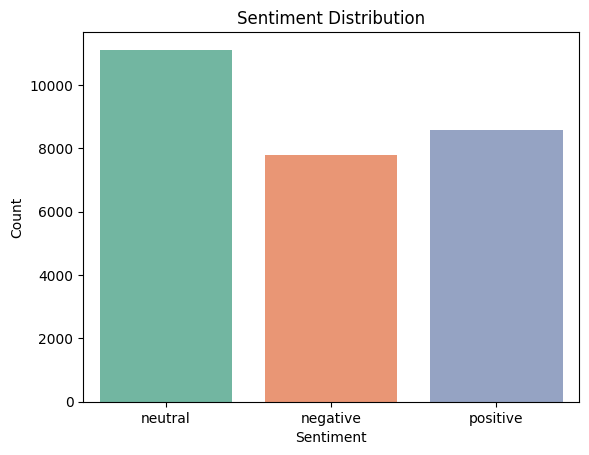

In [10]:
sns.countplot(data=data, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


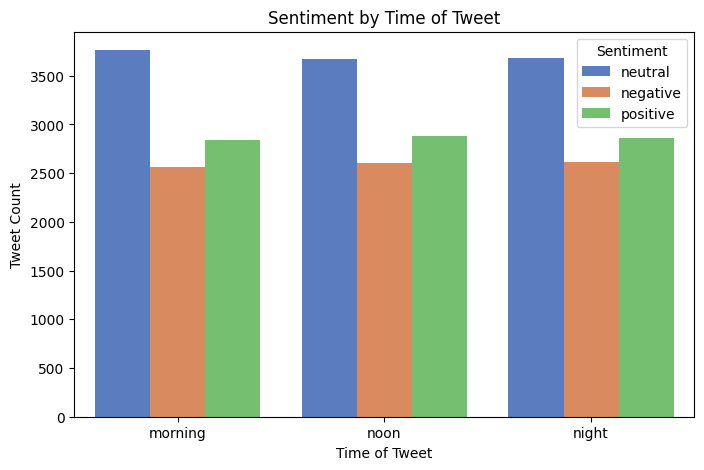

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Time of Tweet', hue='sentiment', palette='muted')
plt.title("Sentiment by Time of Tweet")
plt.xlabel("Time of Tweet")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.show()



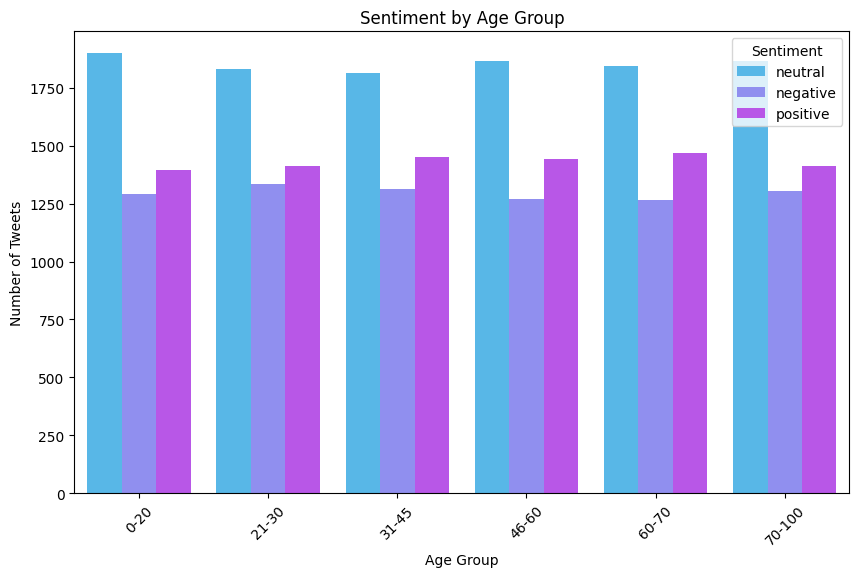

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age of User', hue='sentiment', palette='cool')
plt.title("Sentiment by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()


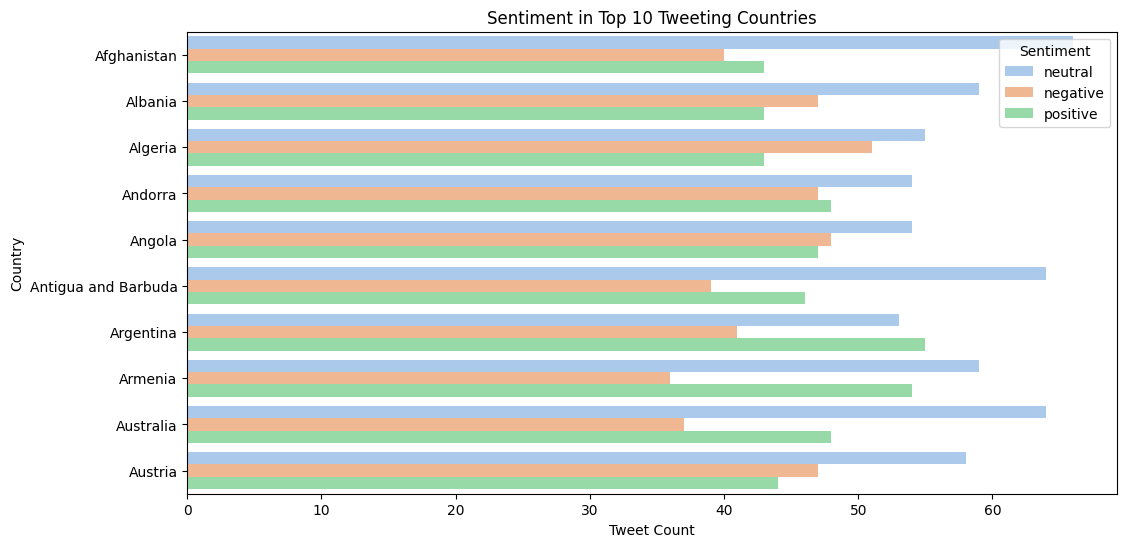

In [13]:
top_countries = data['Country'].value_counts().head(10).index
top_country_data = data[data['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(data=top_country_data, y='Country', hue='sentiment', palette='pastel')
plt.title("Sentiment in Top 10 Tweeting Countries")
plt.xlabel("Tweet Count")
plt.ylabel("Country")
plt.legend(title="Sentiment")
plt.show()


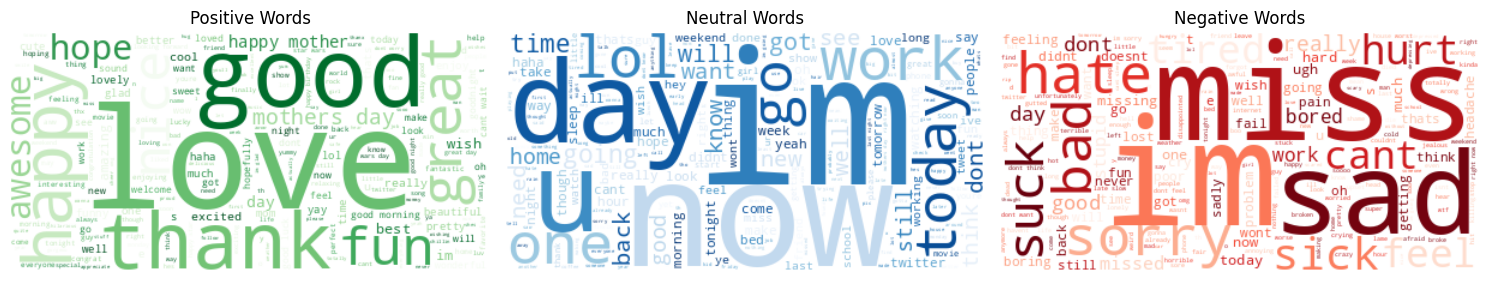

In [14]:
from wordcloud import WordCloud

# Create text blobs for each sentiment
positive_text = " ".join(data[data['sentiment'] == 'positive']['cleaned_text'].dropna())
neutral_text = " ".join(data[data['sentiment'] == 'neutral']['cleaned_text'].dropna())
negative_text = " ".join(data[data['sentiment'] == 'negative']['cleaned_text'].dropna())

# Generate word clouds
plt.figure(figsize=(15, 5))

# Positive
plt.subplot(1, 3, 1)
wordcloud = WordCloud(background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Words")

# Neutral
plt.subplot(1, 3, 2)
wordcloud = WordCloud(background_color='white', colormap='Blues').generate(neutral_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Words")

# Negative
plt.subplot(1, 3, 3)
wordcloud = WordCloud(background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Words")

plt.tight_layout()
plt.show()
